# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, make_scorer
from sklearn.preprocessing import LabelEncoder
from numpy import interp
import warnings 
warnings.filterwarnings('ignore')

C:\Users\hovik.voskanyan\AppData\Local\Temp\ipykernel_15560\711870002.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_train_df= pd.read_csv("C:/Users/hovik.voskanyan/Desktop/Personal/University/Machine Learning/MLProjGroup3/fashion-mnist_train.csv")
data_test_df= pd.read_csv("C:/Users/hovik.voskanyan/Desktop/Personal/University/Machine Learning/MLProjGroup3/fashion-mnist_test.csv")

In [3]:
data_test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
X_train = data_train_df.iloc[:, 1:]  
y_train = data_train_df['label']    

X_test = data_test_df.iloc[:, 1:]   
y_test = data_test_df['label']      

In [5]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [8]:
y_test

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [9]:
def get_data_info(df, name):
    print(f"{name} Data Summary:")
    print(f"Shape: {df.shape}")
    print(f"Missing Values: {df.isnull().sum()}")
    print("\n")

In [10]:
get_data_info(X_train, "X_train")
get_data_info(X_test, "X_test")
get_data_info(y_train, "y_train")
get_data_info(y_test, "y_test")

X_train Data Summary:
Shape: (60000, 784)
Missing Values: pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64


X_test Data Summary:
Shape: (10000, 784)
Missing Values: pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64


y_train Data Summary:
Shape: (60000,)
Missing Values: 0


y_test Data Summary:
Shape: (10000,)
Missing Values: 0


In [11]:
print(y_train.unique())
print(y_test.unique())

[2 9 6 0 3 4 5 8 7 1]
[0 1 2 3 8 6 5 4 7 9]


In [12]:

y_train.value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

In [13]:
y_test.value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64

In [14]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (60000, 784)
X_test shape :  (10000, 784)
y_train shape :  (60000,)
y_test shape :  (10000,)


In [15]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

correlation_matrix_train = X_train_df.corr().abs()
highly_correlated_train = np.triu(correlation_matrix_train, k=1) > 0.9
correlated_features_train = np.where(highly_correlated_train)

features_to_drop_train = set()
for feature1, feature2 in zip(*correlated_features_train):
    features_to_drop_train.add(feature2)

X_train_filtered = X_train_df.drop(columns=X_train_df.columns[list(features_to_drop_train)])
X_test_filtered = X_test_df.drop(columns=X_test_df.columns[list(features_to_drop_train)])

print("Remaining features after removing highly correlated ones in X_train:")
print(X_train_filtered.columns)
print("\nRemaining features after removing highly correlated ones in X_test:")
print(X_test_filtered.columns)


Remaining features after removing highly correlated ones in X_train:
Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=590)

Remaining features after removing highly correlated ones in X_test:
Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=590)


In [16]:
X_train = X_train_filtered
X_test = X_test_filtered

In [17]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (60000, 590)
X_test shape :  (10000, 590)
y_train shape :  (60000,)
y_test shape :  (10000,)


# Model selection

* LogisticRegression
* SVM
* KNN
* Bagging
* AdaBoost
* XGBoost

## LogisticRegression Class

In [18]:
from Models import ModelProcessor

In [19]:
processor = ModelProcessor.ModelProcessor(X_test,X_train,y_test,y_train,LogisticRegression())

In [20]:

scorer = make_scorer(f1_score, average='weighted')  

solver = ['lbfgs']
penalty = ['l2']
c = [0.01]

param_grid = [{'solver': solver,
               'penalty' : penalty,
               'C' : c}]

processor.PrintBestModelParams(scorer, param_grid)

LogisticRegression f1 score:  0.8360942201022574
LogisticRegression best params:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
<class 'dict'>


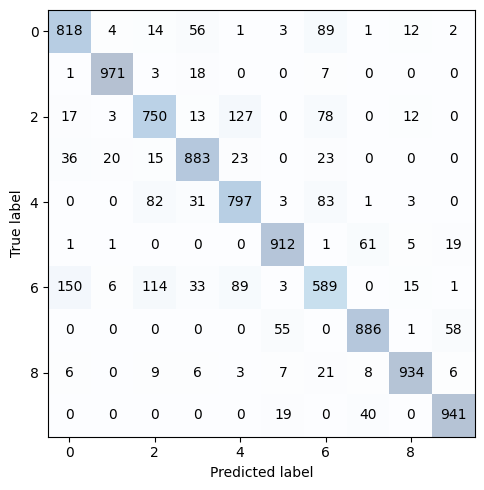

Accuracy: 0.848
Precision: 0.846
Recall: 0.848
F1: 0.847


In [21]:
pipe_log_reg = make_pipeline(
    StandardScaler(),
    PCA(n_components=200),
    LogisticRegression(C=0.01,penalty='l2',solver='lbfgs')
)

processor.FitAndPredict(pipe_log_reg)

processor.print_scores()


In [22]:
processor.print_scores()

Accuracy: 0.848
Precision: 0.846
Recall: 0.848
F1: 0.847


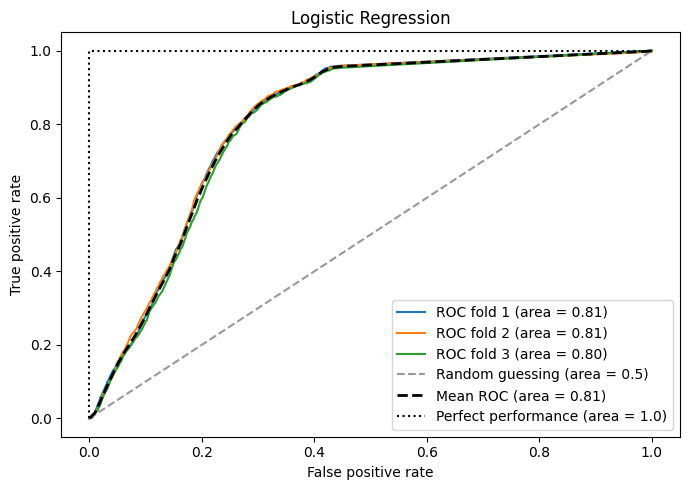

In [23]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           C=0.01))

processor.k_folds(pipe_lr)

## SVM

In [25]:
processor = ModelProcessor.ModelProcessor(X_test,X_train,y_test,y_train,SVC(random_state=1))


In [26]:
processor.model =  SVC(random_state=1)

scorer = make_scorer(f1_score, average='weighted')

# c_gamma_range = [0.01, 0.1, 1.0, 10.0]
# 
# param_grid = [{'svc__C': [0.01, 1.0, 10],
#                'svc__gamma': c_gamma_range,
#                'svc__kernel': ['rbf']}]
c_gamma_range = [0.01]

param_grid = [{'C': [0.01],
               'gamma': c_gamma_range,
               'kernel': ['rbf']}]

processor.PrintBestModelParams(scorer, param_grid)

KeyboardInterrupt: 

In [ ]:
processor.model = SVC(random_state=1)

pipe_svc = make_pipeline(
    StandardScaler(),
    PCA(n_components=150),
    processor.model
)

processor.FitAndPredict(pipe_svc)


In [ ]:
processor.print_scores()

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        SVC(random_state=1,
                             C=0.01, probability=True))

processor.k_folds(pipe_lr)

## KNN

In [28]:
processor.model =  KNeighborsClassifier()


scorer = make_scorer(f1_score, average='weighted')

param_grid = [{'n_neighbors': [3],
               'leaf_size': [15],
               'weights': ['uniform']}]

processor.PrintBestModelParams(scorer, param_grid)

KNeighborsClassifier f1 score:  0.841298015243376
KNeighborsClassifier best params:  {'leaf_size': 15, 'n_neighbors': 3, 'weights': 'uniform'}
<class 'dict'>


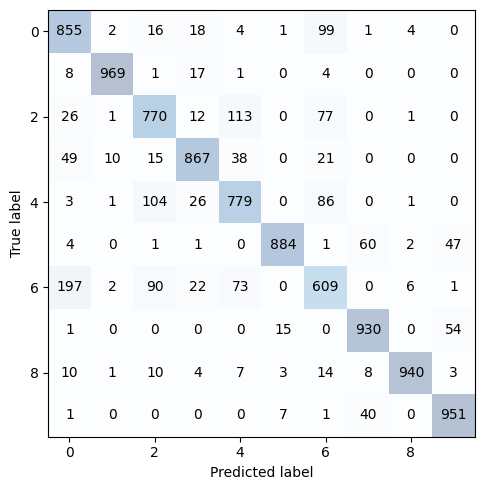

In [29]:
processor.model = KNeighborsClassifier(n_neighbors=3,leaf_size=15,weights='uniform')

pipe_knn = make_pipeline(
    StandardScaler(),
    PCA(n_components=150),
    processor.model
)

processor.FitAndPredict(pipe_knn)


In [30]:
processor.print_scores()

Accuracy: 0.855
Precision: 0.857
Recall: 0.855
F1: 0.855


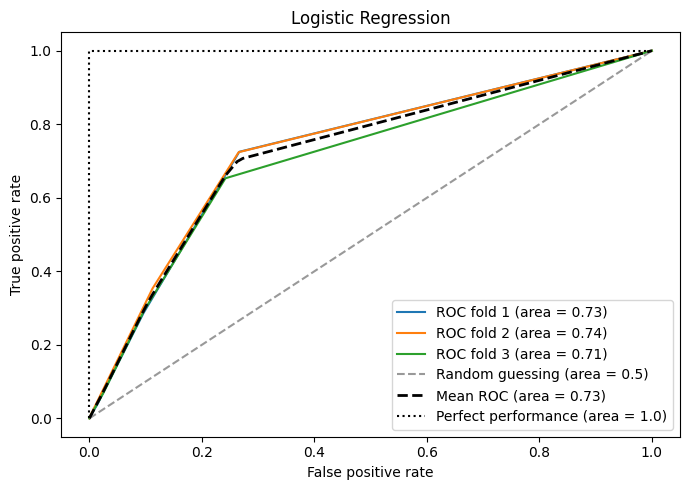

In [31]:
pipe_knn = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        KNeighborsClassifier(n_neighbors=5, 
                                              p=2, 
                                              metric='minkowski'))

processor.k_folds(pipe_knn)

## Bagging

In [ ]:
processor.model =  BaggingClassifier(n_estimators=10, random_state=42)


param_grid = [{
    'base_estimator__n_neighbors': [3, 5, 9],
    'base_estimator__leaf_size': [15, 25, 45],
    'base_estimator__weights': ['uniform', 'distance'],
    'n_estimators': [10, 50],
    'bootstrap': [True, False]
}]

scorer = make_scorer(f1_score, average='weighted')

processor.PrintBestModelParams(scorer, param_grid)

In [ ]:
processor.model = BaggingClassifier(n_estimators=10, random_state=42)

pipe_bagging = make_pipeline(
    StandardScaler(),
    PCA(n_components=150),
    processor.model
)

processor.FitAndPredict(pipe_bagging)


In [ ]:
processor.print_scores()

In [ ]:
pipe_bagging = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        processor.model)

processor.k_folds(pipe_bagging)

## AdaBoost

In [ ]:
processor.model =  AdaBoostClassifier(learning_rate=0.7, random_state=42)


param_grid = [{
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 0,7, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}]

scorer = make_scorer(f1_score, average='weighted')

processor.PrintBestModelParams(scorer, param_grid)

In [ ]:
processor.model = AdaBoostClassifier(learning_rate=0.7, random_state=42) #HERE IS THE BEST Model

pipe_adaboost = make_pipeline(
    StandardScaler(),
    PCA(n_components=150),
    processor.model
)

processor.FitAndPredict(pipe_adaboost)


In [ ]:
processor.print_scores()

In [ ]:
pipe_adaboost = make_pipeline(StandardScaler(),
                              PCA(n_components=2),
                              AdaBoostClassifier(random_state=5, learning_rate = 0.7))

processor.k_folds(pipe_adaboost)

## XGBoost

# Hyperparameter Tuning
Data Validations and etc.

In [ ]:
le = LabelEncoder()
processor.y_train = le.fit_transform(y_train)
processor.y_test = le.transform(y_test)



processor.model =  xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)))


param_grid = [{
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 6, 9],
    'gamma': [0, 0.1, 0.2]
}]

scorer = make_scorer(f1_score, average='weighted')

processor.PrintBestModelParams(scorer, param_grid)

In [ ]:
processor.model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train))) #BEST MODEL

In [ ]:
pipe_xgb = make_pipeline(
    StandardScaler(),  
    PCA(n_components=50),  
    processor.model
)

processor.FitAndPredict(pipe_xgb)

In [ ]:
pipe_xgb = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train))))


processor.k_folds(pipe_xgb)